## ***Failed try***

We initially tried using well-known models like Tesseract for OCR, but they were unable to recognize the characters effectively. As a result, we considered fine-tuning the TrOCR model. However, converting our image dataset into the LSTM format required significant effort, and we estimated that it would take us over 10 hours to complete this conversion. Due to this time constraint, we decided to explore an alternative approach.

In [ ]:
''' updated by test file'''

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.7/107.7 GB disk)


In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import os
import shutil
import pytesseract
import numpy as np
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import random
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import glob
from PIL import Image
from google.colab import drive
import zipfile
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



0: 640x480 1 کل ناحیه پلاک, 173.8ms
Speed: 7.2ms preprocess, 173.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


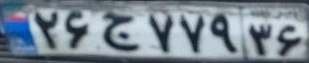

OCR Result for day_00018.png: ۶

0: 640x480 1 کل ناحیه پلاک, 195.9ms
Speed: 4.9ms preprocess, 195.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


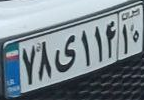

No text detected in the plate for 1403-12-09 22.24.11.jpg.

0: 640x480 1 کل ناحیه پلاک, 226.7ms
Speed: 4.0ms preprocess, 226.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


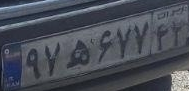

No text detected in the plate for day_00025.png.

0: 640x384 1 کل ناحیه پلاک, 181.7ms
Speed: 3.1ms preprocess, 181.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


OCR Result for 1403-12-09 22.24.31.jpg: اش

0: 640x480 1 کل ناحیه پلاک, 237.2ms
Speed: 4.2ms preprocess, 237.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


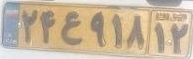

OCR Result for day_00017.png: را

0: 640x480 1 کل ناحیه پلاک, 297.8ms
Speed: 4.1ms preprocess, 297.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


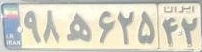

OCR Result for day_00010.png: را

0: 448x640 1 کل ناحیه پلاک, 301.3ms
Speed: 3.8ms preprocess, 301.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


No text detected in the plate for 1403-12-09 22.23.06.jpg.

0: 448x640 2 کل ناحیه پلاکs, 192.1ms
Speed: 5.7ms preprocess, 192.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


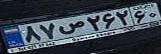

No text detected in the plate for 1403-12-07 20.14.03.jpg.


No text detected in the plate for 1403-12-07 20.14.03.jpg.

0: 480x640 3 کل ناحیه پلاکs, 222.6ms
Speed: 3.9ms preprocess, 222.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


OCR Result for day_00002.png: ۴۱


OCR Result for day_00002.png: دش


OCR Result for day_00002.png: ۲

0: 640x640 1 کل ناحیه پلاک, 311.3ms
Speed: 8.8ms preprocess, 311.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


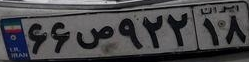

No text detected in the plate for day_00001.png.


In [ ]:
if not os.path.exists("/usr/share/tesseract-ocr/4.00/tessdata/fas.traineddata"):
    !wget -P /usr/share/tesseract-ocr/4.00/tessdata/ https://github.com/tesseract-ocr/tessdata_best/raw/main/fas.traineddata

pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"
os.environ["TESSDATA_PREFIX"] = "/usr/share/tesseract-ocr/4.00/tessdata/"

model_path = "/content/drive/MyDrive/best_model_nano.pt"
model = YOLO(model_path)

zip_file_path = "/content/drive/MyDrive/project/final_test.zip"
extracted_folder = "/content/extracted_images/"

if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

for image_file in image_files:
    image_path = os.path.join(extracted_folder, image_file)
    image = cv2.imread(image_path)

    results = model(image)

    if len(results[0].boxes) == 0:
        print(f"No plates detected in {image_file}.")
        continue

    boxes = results[0].boxes

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cropped_plate = image[y1:y2, x1:x2]

        cv2_imshow(cropped_plate)

        gray_plate = cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2GRAY)
        gray_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        text = pytesseract.image_to_string(gray_plate, lang="fas")

        if text.strip():
            print(f"OCR Result for {image_file}: {text.strip()}")
        else:
            print(f"No text detected in the plate for {image_file}.")
